Data Split

In [62]:
# importing essential libraries which we needed while doing task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("https://raw.githubusercontent.com/Sourav20341/ML/main/.github/workflows/Real%20estate.csv")
X = df.iloc[:,1:-1].values;  # This split all the features from output column
Y = np.reshape(df.iloc[:,-1].values,(-1,1)); # This gives us the output column and we are converting in 2D matrix with the help of reshape for our ease of computation
mean_X = np.mean(X,axis = 0)  # Calculating Mean of Features
std_X = np.std(X,axis = 0)  # Calculating Standard Deviation of Feautres
size_Y = Y.shape # Storing dimesions of Output Column

#Normalisation of Features Data
for i in range(size_X[1]):
  for j in range(size_X[0]):
    X[j][i] = X[j][i] - mean_X[i]
    X[j][i] = X[j][i]/std_X[i]


#insert a column in input matrix for w0 weight
X = np.insert(X,0,1,axis = 1) # inserting a column for bias
size_X = X.shape # Storing dimension of Features

Spliting Data


In [ ]:
# In this code block we are splitting the data for each K fold range from 2 to 5 and stores in variable

# k = 2

X_train21 = X[:int(size_X[0]/2),:]
X_train22 = X[int(size_X[0]/2):,:]
Y_train21 = Y[:int(size_Y[0]/2)]
Y_train22 = Y[int(size_Y[0]/2):]

# k = 3

X_train31 = X[:int(size_X[0]/3),:]
X_train32 = X[int(size_X[0]/3):int(2*size_X[0]/3),:]
X_train33 = X[int(2*size_X[0]/3):,:]
Y_train31 = Y[:int(size_Y[0]/3)]
Y_train32 = Y[int(size_Y[0]/3):int(2*size_Y[0]/3)]
Y_train33 = Y[int(2*size_Y[0]/3):]

# k = 4

X_train41 = X[:int(size_X[0]/4),:]
X_train42 = X[int(size_X[0]/4):int(size_X[0]/2),:]
X_train43 = X[int(size_X[0]/2):int(3*size_X[0]/4),:]
X_train44 = X[int(3*size_X[0]/4):,:]
Y_train41 = Y[:int(size_Y[0]/4)]
Y_train42 = Y[int(size_Y[0]/4):int(size_Y[0]/2)]
Y_train43 = Y[int(size_Y[0]/2):int(3*size_Y[0]/4)]
Y_train44 = Y[int(3*size_Y[0]/4):]

# k = 5

X_train51 = X[:int(size_X[0]/5),:]
X_train52 = X[int(size_X[0]/5):int(2*size_X[0]/5),:]
X_train53 = X[int(2*size_X[0]/5):int(3*size_X[0]/5),:]
X_train54 = X[int(3*size_X[0]/5):int(4*size_X[0]/5),:]
X_train55 = X[int(4*size_X[0]/5):,:]
Y_train51 = Y[:int(size_Y[0]/5)]
Y_train52 = Y[int(size_Y[0]/5):int(2*size_Y[0]/5)]
Y_train53 = Y[int(2*size_Y[0]/5):int(3*size_Y[0]/5)]
Y_train54 = Y[int(3*size_Y[0]/5):int(4*size_Y[0]/5)]
Y_train55 = Y[int(4*size_Y[0]/5):]

Linear Regression Gradient Descent 

In [ ]:
# In this code block we are implementing Gradient Descent function,root mean square function, mean square function, Transpose function

def rmse(y_expected,y_pred):  # this returns root mean square value
  val = mse(y_expected,y_pred)
  return math.sqrt(val)

def mse(y_expected,y_pred):  # this returns mean square value
  size = y_expected.size
  J = 0
  for i in range(size):
    J += (y_expected[i] - y_pred[i])**2
  J = J/size
  return J

def Transpose(array):  # this transpose the array
  n,m = array.shape
  res = np.zeros((m,n))
  for i in range(n):
    for j in range(m):
      res[j][i] = array[i][j]
  return res
  
def DescentGradient(X,Y,epoch=1300,p = False,model_num = 0):  # this returns the weight 
  RMSE = []          # this array stores the root mean square value at each iteration
  Iteration_Number = [] # this array stores the iteration number at each iteration
  alpha = 0.006  # this is our learning rate
  weight = np.zeros((1,7)) # intialising weight array 
  for i in range(7):
    weight[0,i] = 2
  for i in range(epoch):
    T = Transpose(weight)   # transposing the weight matrix
    sumpart = np.matmul(X,T) - Y  # we are multiplying Transpose of weight with features and minus it with output
    cost = np.sum(X*sumpart,axis = 0)/X.shape[0]  # this gives us the cost 
    weight = weight - alpha*cost  # this updates the weight according to gradient descent 
    RMSE = np.append(RMSE,rmse(Y,np.matmul(X,T)))  # store the current rmse in array
    Iteration_Number = np.append(Iteration_Number,i) # store the iteration in array
  if(p):
    # below code is for ploting the graph
    s = "Model " + str(model_num)
    plt.xlabel("Iteration")
    plt.ylabel("RMSE")
    plt.plot(Iteration_Number,RMSE,label = s)
    plt.legend()
  return weight;  # returning the weight

Root Mean Error Count for all values of K

In [ ]:
# In this Code block we are only calculating rmse for each K and find mean rmse for each k and reporting it by print the error and also we are using vstack
# for concatenation the 2 matrix because we are joing k-1 matrix for training and other matrix for testing

# k = 2

wt21 = DescentGradient(X_train21,Y_train21)
error21 = rmse(Y_train22,np.matmul(X_train22,Transpose(wt21)))
wt22 = DescentGradient(X_train22,Y_train22)
error22 = rmse(Y_train21,np.matmul(X_train21,Transpose(wt22)))
meanerror2 = (error21+error22)/2
print("Mean RMSE for K = 2 :- " +  str(meanerror2))

# k = 3

wt31 = DescentGradient(np.vstack((X_train31,X_train32)),np.vstack((Y_train31,Y_train32)))
error31 = rmse(Y_train33,np.matmul(X_train33,Transpose(wt31)))
wt32 = DescentGradient(np.vstack((X_train31,X_train33)),np.vstack((Y_train31,Y_train33)))
error32 = rmse(Y_train32,np.matmul(X_train32,Transpose(wt32)))
wt33 = DescentGradient(np.vstack((X_train32,X_train33)),np.vstack((Y_train32,Y_train33)))
error33 = rmse(Y_train31,np.matmul(X_train31,Transpose(wt33)))
meanerror3 = (error31+error32+error33)/3
print("Mean RMSE for K = 3 :- " + str(meanerror3))

# k = 4

wt41 = DescentGradient(np.vstack((np.vstack((X_train41,X_train42)),X_train43)),np.vstack((np.vstack((Y_train41,Y_train42)),Y_train43)))
error41 = rmse(Y_train44,np.matmul(X_train44,Transpose(wt41)))
wt42 = DescentGradient(np.vstack((np.vstack((X_train41,X_train42)),X_train44)),np.vstack((np.vstack((Y_train41,Y_train42)),Y_train44)))
error42 = rmse(Y_train43,np.matmul(X_train43,Transpose(wt42)))
wt43 = DescentGradient(np.vstack((np.vstack((X_train41,X_train43)),X_train44)),np.vstack((np.vstack((Y_train41,Y_train43)),Y_train44)))
error43 = rmse(Y_train42,np.matmul(X_train42,Transpose(wt43)))
wt44 = DescentGradient(np.vstack((np.vstack((X_train42,X_train43)),X_train44)),np.vstack((np.vstack((Y_train42,Y_train43)),Y_train44)))
error44 = rmse(Y_train41,np.matmul(X_train41,Transpose(wt44)))
meanerror4 = (error41+error42+error43+error44)/4
print("Mean RMSE for K = 4 :- "+str(meanerror4))

# k = 5

trainingSet51_X = np.vstack((np.vstack((np.vstack((X_train51,X_train52)),X_train53)),X_train54))
trainingSet51_Y = np.vstack((np.vstack((np.vstack((Y_train51,Y_train52)),Y_train53)),Y_train54))
wt51 = DescentGradient(trainingSet51_X,trainingSet51_Y)
error51 = rmse(Y_train55,np.matmul(X_train55,Transpose(wt51)))
error51t = rmse(trainingSet51_Y,np.matmul(trainingSet51_X,Transpose(wt51)))

trainingSet52_X = np.vstack((np.vstack((np.vstack((X_train51,X_train52)),X_train53)),X_train55))
trainingSet52_Y = np.vstack((np.vstack((np.vstack((Y_train51,Y_train52)),Y_train53)),Y_train55))
wt52 = DescentGradient(trainingSet52_X,trainingSet52_Y)
error52 = rmse(Y_train54,np.matmul(X_train54,Transpose(wt52)))
error52t = rmse(trainingSet52_Y,np.matmul(trainingSet52_X,Transpose(wt52)))

trainingSet53_X = np.vstack((np.vstack((np.vstack((X_train51,X_train52)),X_train54)),X_train55))
trainingSet53_Y = np.vstack((np.vstack((np.vstack((Y_train51,Y_train52)),Y_train54)),Y_train55))
wt53 = DescentGradient(trainingSet53_X,trainingSet53_Y)
error53 = rmse(Y_train53,np.matmul(X_train53,Transpose(wt53)))
error53t = rmse(trainingSet53_Y,np.matmul(trainingSet53_X,Transpose(wt53)))

trainingSet54_X = np.vstack((np.vstack((np.vstack((X_train51,X_train53)),X_train54)),X_train55))
trainingSet54_Y = np.vstack((np.vstack((np.vstack((Y_train51,Y_train53)),Y_train54)),Y_train55))
wt54 = DescentGradient(trainingSet54_X,trainingSet54_Y)
error54 = rmse(Y_train52,np.matmul(X_train52,Transpose(wt54)))
error54t = rmse(trainingSet54_Y,np.matmul(trainingSet54_X,Transpose(wt54)))

trainingSet55_X = np.vstack((np.vstack((np.vstack((X_train52,X_train53)),X_train54)),X_train55))
trainingSet55_Y = np.vstack((np.vstack((np.vstack((Y_train52,Y_train53)),Y_train54)),Y_train55))
wt55 = DescentGradient(trainingSet55_X,trainingSet55_Y)
error55 = rmse(Y_train51,np.matmul(X_train51,Transpose(wt55)))
error55t = rmse(trainingSet55_Y,np.matmul(trainingSet55_X,Transpose(wt55)))
meanerror5 = (error51+error52+error53+error54+error55)/5
print("Mean RMSE for K = 5 :- " + str(meanerror5))

Plotting

In [ ]:
# In this code block we are reporting the train and set val loss and with that we are also ploting rmse vs iteation graph for k = 5 which we find optimal from pevious part

wt51 = DescentGradient(trainingSet51_X,trainingSet51_Y,p = True,model_num = 1)
error51 = rmse(Y_train55,np.matmul(X_train55,Transpose(wt51)))
error51t = rmse(trainingSet51_Y,np.matmul(trainingSet51_X,Transpose(wt51)))
# print(error51)
# print(error51t)

wt52 = DescentGradient(trainingSet52_X,trainingSet52_Y,p=True,model_num = 2)
error52 = rmse(Y_train54,np.matmul(X_train54,Transpose(wt52)))
error52t = rmse(trainingSet52_Y,np.matmul(trainingSet52_X,Transpose(wt52)))
# print(error52t)
# print(error52)

wt53 = DescentGradient(trainingSet53_X,trainingSet53_Y,p=True,model_num = 3)
error53 = rmse(Y_train53,np.matmul(X_train53,Transpose(wt53)))
error53t = rmse(trainingSet53_Y,np.matmul(trainingSet53_X,Transpose(wt53)))
# print(error53)
# print(error53t)

wt54 = DescentGradient(trainingSet54_X,trainingSet54_Y,p=True,model_num = 4)
error54 = rmse(Y_train52,np.matmul(X_train52,Transpose(wt54)))
error54t = rmse(trainingSet54_Y,np.matmul(trainingSet54_X,Transpose(wt54)))
# print(error54t)
# print(error54)

wt55 = DescentGradient(trainingSet55_X,trainingSet55_Y,p=True,model_num = 5)
error55 = rmse(Y_train51,np.matmul(X_train51,Transpose(wt55)))
error55t = rmse(trainingSet55_Y,np.matmul(trainingSet55_X,Transpose(wt55)))
meanerror5 = (error51+error52+error53+error54+error55)/5
# print(error55t)
# print(error55)

print("Training RMSE for K = 5 :- "+str((error51t+error52t+error53t+error54t+error55t)/5));
print("Val Set RMSE for K = 5 :- " + str(meanerror5))


Ridge Regression

In [79]:
# In this code block we are implementing Ridge_Regression and this is similar to gradient descent but the changes which has been made here is explained

def Ridge_Regression(X,Y,epoch=1350,model_num = 0):  
  plot = []
  plot1 = []
  alpha = 0.006
  lamb = 0.0055  # regularization perimeter  
  weight = np.zeros((1,7))
  for i in range(7):
    weight[0,i] = 2
  for i in range(epoch):
    T = Transpose(weight)
    sumpart = np.matmul(X,T) - Y
    cost = np.sum(X*sumpart,axis = 0)/X.shape[0]
    weight = (1-2*lamb*alpha)*weight - 2*alpha*cost   # adding ridge regularization penalty while calculating weight
    plot = np.append(plot,rmse(Y,np.matmul(X,T)))
    plot1 = np.append(plot1,i)
  s = "Model " + str(model_num)
  plt.xlabel("Iteration")
  plt.ylabel("RMSE")
  plt.plot(plot1,plot,label = s)
  plt.legend()
  return weight;

Ridge Plotting

Training Error :- 8.768364520982155
Testing Error :- 8.69599974745391


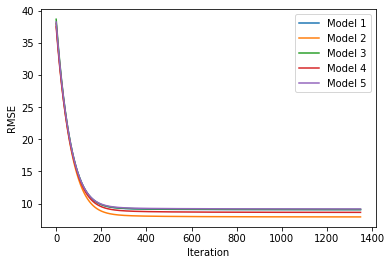

In [80]:
# In this code block we are calculating rmse and find weights with ridge regulrization for each model of k = 5 and reporting the mean rmse on train and val set with that we are ploting the graph

# Model1
wtR1 = Ridge_Regression(trainingSet51_X,trainingSet51_Y,model_num = 1)
errorR1 = rmse(Y_train55,np.matmul(X_train55,Transpose(wtR1)))
errorRt1 = rmse(trainingSet51_Y,np.matmul(trainingSet51_X,Transpose(wtR1)))

# Model2
wtR2 = Ridge_Regression(trainingSet52_X,trainingSet52_Y,model_num = 2)
errorR2 = rmse(Y_train54,np.matmul(X_train54,Transpose(wtR2)))
errorRt2 = rmse(trainingSet52_Y,np.matmul(trainingSet52_X,Transpose(wtR2)))

# Model3
wtR3 = Ridge_Regression(trainingSet53_X,trainingSet53_Y,model_num = 3)
errorR3 = rmse(Y_train53,np.matmul(X_train53,Transpose(wtR3)))
errorRt3 = rmse(trainingSet53_Y,np.matmul(trainingSet53_X,Transpose(wtR3)))


# Model4
wtR4 = Ridge_Regression(trainingSet54_X,trainingSet54_Y,model_num = 4)
errorR4 = rmse(Y_train52,np.matmul(X_train52,Transpose(wtR4)))
errorRt4 = rmse(trainingSet54_Y,np.matmul(trainingSet54_X,Transpose(wtR4)))

# Model5
wtR5 = Ridge_Regression(trainingSet55_X,trainingSet55_Y,model_num = 5)
errorR5 = rmse(Y_train51,np.matmul(X_train51,Transpose(wtR5)))
errorRt5 = rmse(trainingSet55_Y,np.matmul(trainingSet55_X,Transpose(wtR5)))

print("Training Error :- " + str((errorRt1 + errorRt2 + errorRt3 + errorRt4 + errorRt5)/5))
print("Testing Error :- " + str((errorR1 + errorR2 + errorR3 + errorR4 + errorR5)/5))

Lasso Regression

In [67]:
# In this code block we are implementing Lasso Regularization and it is very similar to gradient descent

def lasso_Regression(X,Y,epoch=1200,model_num = 0):
  RMSE = []
  Iteration_Count = []
  alpha = 0.006 
  lamb = 0.0001  # Regularization Perimeter
  weight = np.zeros((1,7))
  for i in range(7):
    weight[0,i] = 2
  for i in range(epoch):
    T = Transpose(weight)
    sumpart = np.matmul(X,T) - Y
    cost = np.sum(X*sumpart,axis = 0)/X.shape[0]
    weight = weight - alpha*cost + lamb*np.sum(weight/np.abs(weight))  # adding lasso regularization penatly while calculating the weights
    RMSE = np.append(RMSE,rmse(Y,np.matmul(X,T)))
    Iteration_Count = np.append(Iteration_Count,i)
  s = "Model " + str(model_num)
  plt.xlabel("Iteration")
  plt.ylabel("RMSE")
  plt.plot(Iteration_Count,RMSE,label = s)
  plt.legend()
  return weight;

Lasso Ploting

In [ ]:
# In this code block we are calculating rmse and find weights with lasso regulrization for each model of k = 5 and reporting the mean rmse on train and val set with that we are ploting the graph

# Model1
wtl1 = lasso_Regression(trainingSet51_X,trainingSet51_Y,model_num = 1)
errorl1 = rmse(Y_train55,np.matmul(X_train55,Transpose(wtl1)))
errorlt1 = rmse(trainingSet51_Y,np.matmul(trainingSet51_X,Transpose(wtl1)))

# Model2
wtl2 = lasso_Regression(trainingSet52_X,trainingSet52_Y,model_num = 2)
errorl2 = rmse(Y_train54,np.matmul(X_train54,Transpose(wtl2)))
errorlt2 = rmse(trainingSet52_Y,np.matmul(trainingSet52_X,Transpose(wtl2)))

# Model3
wtl3 = lasso_Regression(trainingSet53_X,trainingSet53_Y,model_num = 3)
errorl3 = rmse(Y_train53,np.matmul(X_train53,Transpose(wtl3)))
errorlt3 = rmse(trainingSet53_Y,np.matmul(trainingSet53_X,Transpose(wtl3)))


# Model4
wtl4 = lasso_Regression(trainingSet54_X,trainingSet54_Y,model_num = 4)
errorl4 = rmse(Y_train52,np.matmul(X_train52,Transpose(wtl4)))
errorlt4 = rmse(trainingSet54_Y,np.matmul(trainingSet54_X,Transpose(wtl4)))

# Model5
wtl5 = lasso_Regression(trainingSet55_X,trainingSet55_Y,model_num = 5)
errorl5 = rmse(Y_train51,np.matmul(X_train51,Transpose(wtl5)))
errorlt5 = rmse(trainingSet55_Y,np.matmul(trainingSet55_X,Transpose(wtl5)))

print("Training Error :- " + str((errorlt1 + errorlt2 + errorlt3 + errorlt4 + errorlt5)/5))
print("Testing Error :- " + str((errorl1 + errorl2 + errorl3 + errorl4 + errorl5)/5))

Normal Equation Function

In [ ]:
# In this code block we are implementing Normal Form of Linear regression which is (Xtranspose * X)-1 . (Xtranspose * Y)

def NoramlEquation(X,Y):
  trans = Transpose(X)  # Transposing X matrix
  x = np.matmul(trans,X) # multiply Transpose of X with X
  inv = np.linalg.inv(x) # inverse the resultant of multiplication
  xTy = np.matmul(trans,Y) # Multiplying transpose of X with Y
  weight = np.matmul(inv,xTy) # multiplying inverse matrix with resultant which we get from above multiplication
  return weight # return weights after all operation perform

Normal Equation for Optimal K which is 5

In [ ]:
# In this code block we are calculating Mean Rmse for k = 5

wtN1 = NoramlEquation(trainingSet51_X,trainingSet51_Y)
errorN1 = rmse(Y_train55,np.matmul(X_train55,wtN1))
# print(errorN1)

wtN2 = NoramlEquation(trainingSet52_X,trainingSet52_Y)
errorN2 = rmse(Y_train54,np.matmul(X_train54,wtN2))
# print(errorN2)

wtN3 = NoramlEquation(trainingSet53_X,trainingSet53_Y)
errorN3 = rmse(Y_train53,np.matmul(X_train53,wtN3))
# print(errorN3)

wtN4 = NoramlEquation(trainingSet54_X,trainingSet54_Y)
errorN4 = rmse(Y_train52,np.matmul(X_train52,wtN4))
# print(errorN4)

wtN5 = NoramlEquation(trainingSet55_X,trainingSet55_Y)
errorN5 = rmse(Y_train51,np.matmul(X_train51,wtN5))
# print(errorN5)

print((errorN1 + errorN2 + errorN3 + errorN4 + errorN5)/5)